<a href="https://colab.research.google.com/github/javiromeroo/Algoritmos-y-Estructuras-de-Datos/blob/main/Tarea1_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea 1 Javiera Romero Orrego 21166885-7

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
def arena(N):
  r = math.trunc(math.sqrt(N/math.pi)+0.2*(math.sqrt(N/math.pi)))
  d = r*2
  m = np.zeros((d+1, d+1), int)
  m[r][r] = N
  cuatro = True
  vueltas=0
  while(cuatro):
    c=0
    for i in range(d+1):
      for j in range(d+1):
        if m[i][j] >= 4:
          m[i][j] -= 4
          m[i+1][j] += 1
          m[i-1][j] += 1
          m[i][j+1] += 1
          m[i][j-1] += 1
          c+=1
          vueltas+=1
    if c>= 1:
      cuatro = True
    else:
      cuatro= False
  plt.matshow(m)
  plt.show()
  print("Cantidad de veces que se ejecutó la regla de distribución: "+str(vueltas))

¿Cómo se caluló el tamaño del tablero?: Me guié por la indicación del profesor Nelson Baloian que comunicaron por discord, la cual basicamente nos decía que nos pusieramos en el peor de los casos donde queda al menos 1 grano en cada casillero del tablero, para evitar que nos falte espacio y considerando que el programa distribuye los granos al rededor del centro de manera simetrica, podemos concluir que la cantidad de casilleros que necesitamos estaria dada por el área de un circulo, por lo que ocupamos N como el area y ocupando la formula de dicha área calculamos el radio agregando tambien un 20% de este valor del radio para evitar problemas y evitar que por cualquier complicación nos falte espacio, luego con este valor calculamos el diametro de dicho circulo lo que nos dará las dimensiones de nuestro tablero/matriz adecuado.

Ahora ejecute la función para $N=128$:

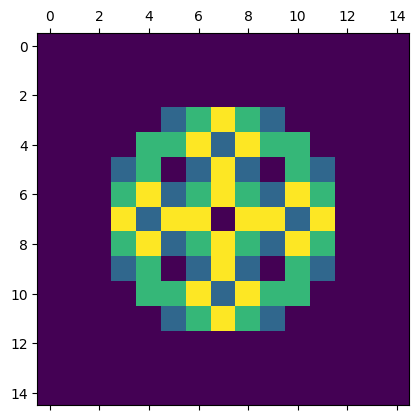

Cantidad de veces que se ejecutó la regla de distribución: 342


In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

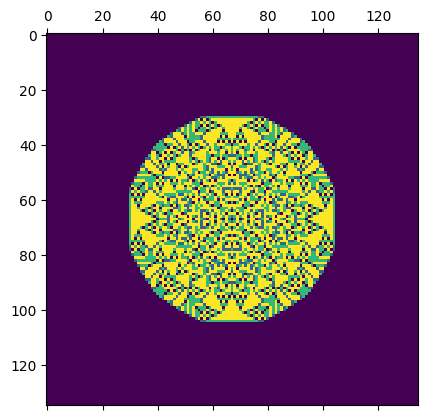

Cantidad de veces que se ejecutó la regla de distribución: 1830917


In [ ]:
arena(10000) # se demoraba aprox 1 minuto y 8 segundos

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
def arena2(N):
  r = math.trunc((math.sqrt(N/math.pi) + 0.2*(math.sqrt(N/math.pi))))
  d = r*2
  m = np.zeros((d+1, d+1), float)
  m[r][r] = N
  cuatro = True
  vueltas=0
  while(cuatro):
    c=0
    for j in range(d+1):
      for i in range(d+1):
        if m[i][j] >= 4:
         a = math.floor(m[i][j]/4)
         m[i][j] -= 4*a
         m[i+1][j] += a
         m[i-1][j] += a
         m[i][j+1] += a
         m[i][j-1] += a
         c+=1
         vueltas+=1
    if c>= 1:
      cuatro = True
    else:
      cuatro= False
  plt.matshow(m)
  plt.show()
  print("cantidad de veces que se ejecutó la regla de distribución: "+str(vueltas))

Ahora ejecute la función para $N=128$:

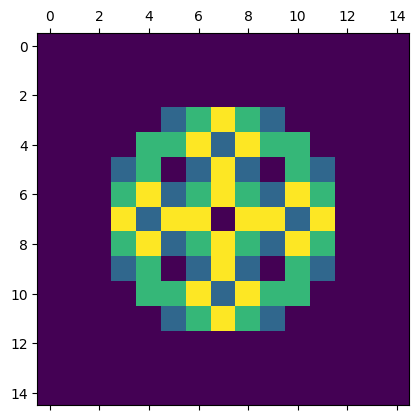

cantidad de veces que se ejecutó la regla de distribución: 227


In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

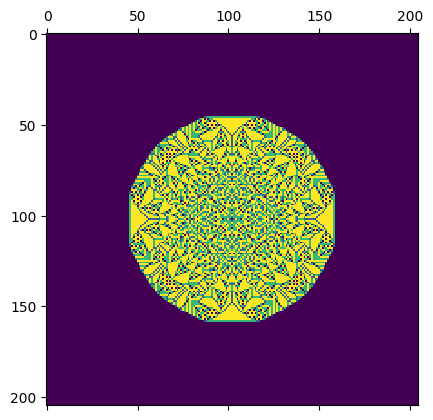

cantidad de veces que se ejecutó la regla de distribución: 6222912


In [ ]:
arena2(23000) # se demoro aprox 1 minuto 9 segundos 23000

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

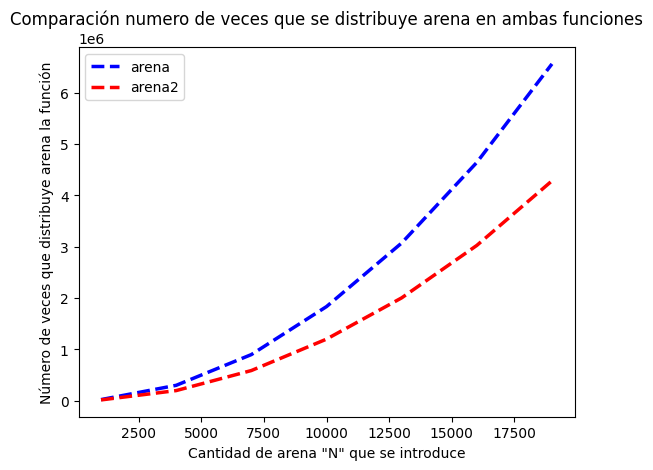

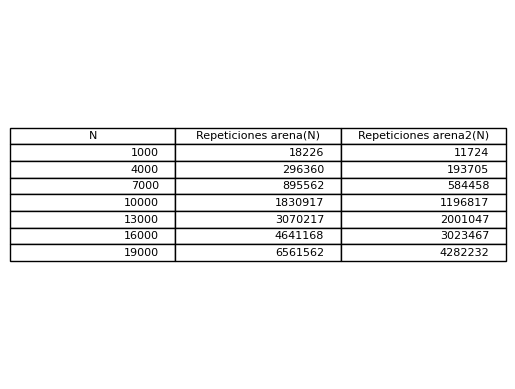

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#x N de arena para arena 1 y 2
#y1 cantidad de veces que se distribuye la arena en arena1
#y2 cantidad de veces que se distribuye la arena en arena2

x=(1000, 4000, 7000, 10000, 13000, 16000, 19000)
y1 =(18226,296360,895562,1830917,3070217,4641168,6561562)
y2=(11724,193705, 584458, 1196817,2001047,3023467,4282232)


plt.plot(x, y1, color="blue", linewidth=2.5, linestyle="--", label="arena")
plt.plot(x, y2, color="red",  linewidth=2.5, linestyle="--", label="arena2")
plt.legend(loc='upper left')
plt.title("Comparación numero de veces que se distribuye arena en ambas funciones")
plt.ylabel("Número de veces que distribuye arena la función")
plt.xlabel('Cantidad de arena "N" que se introduce')


fig, ax =plt.subplots(1,1)
data=[[1000,18226,11724],
      [4000,296360,193705],
      [7000,895562,584458],
      [10000,1830917,1196817],
      [13000,3070217,2001047],
      [16000,4641168,3023467],
      [19000,6561562,4282232]]
column_labels=['N', "Repeticiones arena(N)", "Repeticiones arena2(N)"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")
plt.show()

**Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran:** Definitivamente vale la pena la optimización sobre todo para numeros más grandes, podemos ver que mientras más grande es el número de N más es la diferencia de la cantidad de veces que se debe aplicar la regla en las funciones, además como vimos en un tiempo similar arena2 procesa más del doble de lo que alcazaba arena en un minuto y 9 segundos aprox.

Con respecto a otras optimizaciones, la primera que se me viene a la mente es indicarle al programa que cuando se quiten más de 16 granos de la casilla central, tambien le quite granos a las casillas vecinas pues sabemos que quedaran con 4 o mas granos una vez que se haga la distribución de la casilla central y de esta manera reducimos la cantiidad de veces que se aplique la regla. Otra optimización podria ser respecto al tablero, si reducimos la cantidad de casilleros con 0 granos de arena la funcion tendrá menos casilleros que recorrer en cada vuelta esto se podría hacer tal vez ocupando un logaritmo en vez del área de un circulo para generar el tablero.

# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

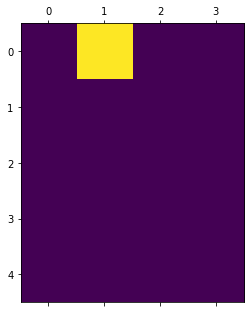

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.